In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nba.csv')

In [3]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
df.shape

(458, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [6]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [7]:
null_row = df[df['Name'].isnull()]
null_row

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(index=457, inplace=True)

In [9]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [10]:
df = df.reset_index(drop=True)

In [11]:
df['Position'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [21]:
df['Feet'] = df['Height'].str.split(pat='-').str[0].astype(float)
df['Inch'] = df['Height'].str.split(pat='-').str[1].astype(float)
df['Height'] = ((df['Feet']*30.48) + (df['Inch']*2.54))

In [22]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Feet,Inch
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,187.96,180.0,Texas,7730337.0,6.0,2.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,198.12,235.0,Marquette,6796117.0,6.0,6.0
2,John Holland,Boston Celtics,30.0,SG,27.0,195.58,205.0,Boston University,NaN,6.0,5.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,195.58,185.0,Georgia State,1148640.0,6.0,5.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,208.28,231.0,NaN,5000000.0,6.0,10.0


In [23]:
numerical_df = df[['Number','Position','Age','Height','Weight','Salary']]

In [24]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    457 non-null    float64
 1   Position  457 non-null    object 
 2   Age       457 non-null    float64
 3   Height    457 non-null    float64
 4   Weight    457 non-null    float64
 5   Salary    446 non-null    float64
dtypes: float64(5), object(1)
memory usage: 21.6+ KB


In [25]:
numerical_df.head()

,Number,Position,Age,Height,Weight,Salary
0,0.0,PG,25.0,187.96,180.0,7730337.0
1,99.0,SF,25.0,198.12,235.0,6796117.0
2,30.0,SG,27.0,195.58,205.0,NaN
3,28.0,SG,22.0,195.58,185.0,1148640.0
4,8.0,PF,29.0,208.28,231.0,5000000.0


In [16]:
numerical_df[['Number','Age']] = numerical_df[['Number','Age']].astype(int)

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_14264\1725569863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df[['Number','Age']] = numerical_df[['Number','Age']].astype(int)


In [26]:
numerical_df.head()

,Number,Position,Age,Height,Weight,Salary
0,0.0,PG,25.0,187.96,180.0,7730337.0
1,99.0,SF,25.0,198.12,235.0,6796117.0
2,30.0,SG,27.0,195.58,205.0,NaN
3,28.0,SG,22.0,195.58,185.0,1148640.0
4,8.0,PF,29.0,208.28,231.0,5000000.0


In [29]:
numerical_df['Position'] = numerical_df['Position'].replace({'PG':0, 'SF':1, 'SG':2, 'PF':3, 'C':4})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_14264\1047202512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_df['Position'] = numerical_df['Position'].replace({'PG':0, 'SF':1, 'SG':2, 'PF':3, 'C':4})
C:\Users\Dushyant\AppData\Local\Temp\ipykernel_14264\1047202512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['Position'] = numerical_df['Position'].replace({'PG':0, 'SF':1, 'SG':2, 'PF':3, 'C':4})


In [30]:
numerical_df.head()

,Number,Position,Age,Height,Weight,Salary
0,0.0,0,25.0,187.96,180.0,7730337.0
1,99.0,1,25.0,198.12,235.0,6796117.0
2,30.0,2,27.0,195.58,205.0,NaN
3,28.0,2,22.0,195.58,185.0,1148640.0
4,8.0,3,29.0,208.28,231.0,5000000.0


In [31]:
# correlation
corr_matrix = numerical_df.corr()
corr_matrix

,Number,Position,Age,Height,Weight,Salary
Number,1.000000,0.246758,0.028724,0.256102,0.206921,-0.112386
Position,0.246758,1.000000,0.040937,0.804297,0.776942,0.032934
Age,0.028724,0.040937,1.000000,-0.008221,0.087183,0.213459
Height,0.256102,0.804297,-0.008221,1.000000,0.827701,0.058792
Weight,0.206921,0.776942,0.087183,0.827701,1.000000,0.138321
Salary,-0.112386,0.032934,0.213459,0.058792,0.138321,1.000000


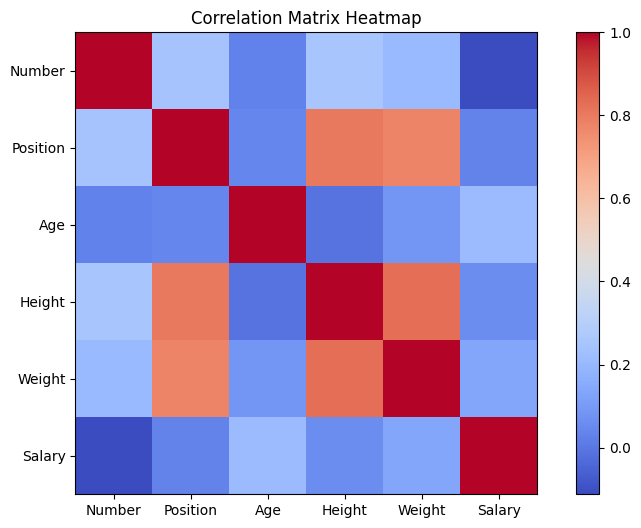

In [32]:
# HeatMap
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
Feet         0
Inch         0
dtype: int64

In [34]:
df.drop(['Feet','Inch'], axis=1, inplace=True)

In [35]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,187.96,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,198.12,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,195.58,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,195.58,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,208.28,231.0,NaN,5000000.0


In [56]:
group1 = df.groupby('College')['Team']
group1.value_counts()

College    Team                
Alabama    Cleveland Cavaliers     1
           Memphis Grizzlies       1
           New Orleans Pelicans    1
Arizona    Cleveland Cavaliers     2
           Indiana Pacers          2
                                  ..
Wisconsin  Houston Rockets         1
           Phoenix Suns            1
           Sacramento Kings        1
Wyoming    Los Angeles Lakers      1
Xavier     San Antonio Spurs       1
Name: count, Length: 336, dtype: int64